## Final Project Submission

Please fill out:
* Student name: PATIENCE ANONO
* Student pace: FULL TIME
* Scheduled project review date/time: 
* Instructor name: MARK TIBA
* Blog post URL:


1. INTRODUCTION<br>

In this project,Microsoft was launching a new movie studio and i had to make recommendations to the stake holders.
I had to find out what types of films are doing best in the current market at the moment and present the findings to the Microsoft executives.I used exploratory data analysis to generate insights for the business.To get started, I was given the following sets of data obtained from the following sources:
Box Office Mojo.
IMDB.
Rotten Tomatoes.
TheMovieDB.
The Numbers.

I was assigned with the following tasks:
Explore the given data and/or find complementary data
Obtain meaningful, actionable insights from it that will
Help the new head of the studio decide What type of films to create.

2. BUSINESS PROBLEM<br>

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies.After my survey,i found a lot of information on individual movies.There are countless factors at play in creating original video content for a movie studio, from determining production costs to developing targeted marketing campaigns.

2.1 Objectives<br>
As a consultant, i decided to focus my analysis on:
1.High level recommendation on genres because once the studio understood what sort of films they wanted to make,they would make better decisons.
2.The most lucrative time to release the movies.
3.The production budget to achieve the highest likely returns on investment.
4.The type of films  that are currently doing the best at the box office.
5.What  people like.
6.How much does it costs to make each type of movie.
8.How much money they are making.

3. DATA UNDERSTANDING<br>
With a seemingly endless array of movies and television shows for users to choose from, retaining viewers is of paramount importance to streaming services and film production companies.If viewer recommendations are not accurate,this could lead to that viewer turning to watch other things.


4. DATA PREPARATION<br>
I utilized different sources for my analysis such as Inspecting all of the data sets provided using python and pandas library, storing and cleaning the data in a pandas dataframe and visualization of data using seaborn and matplotlib.Idecided to focus more on the genre and finances.


4.1 LOADING DATA INTO OUR JUPYTER NOTEBOOK<br>
 Importing required Libraries

In [1]:
# importing the necessary packages to use for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import csv
import sqlite3
%matplotlib inline

In [2]:
#moving into the folder to get the files
! ls

README.md
student.ipynb
zippedData


In [3]:
cd zippedData

C:\Users\Patience\Documents\GitHub\project1\zippedData


In [4]:
! ls

bom.movie_gross.csv.gz
im.db
im.db.zip
rt.movie_info.tsv.gz
rt.reviews.tsv.gz
tmdb.movies.csv.gz
tn.movie_budgets.csv.gz


4.1.1 MOVIE INFO DATA
Reading the data files contained in the csv folder


In [5]:
# Load 'rt.movie_info.tsv.gz' as a DataFrame.The first 5 rows.
data = pd.read_table('rt.movie_info.tsv.gz',dtype='str' )
data.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


4.1.2 Accessing Data from the DataFrame

In [6]:
#lets put the read information into an assigned variable df and Get a concise summary of the data using .info()(checking the data types and data values)
data = pd.read_table('rt.movie_info.tsv.gz')
data.info()                                 #Get a concise summary of the data using .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
#Obtain a tuple representing the number of rows and number of columns
data.shape

(1560, 12)

In [8]:
#checking for null values in our dataFrame
data.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [9]:
data.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

4.1.3 Retrieving relevant Information.

In [11]:
relevant_features =  ['rating', 'genre', 'director','runtime', 'box_office']
relevant_features

['rating', 'genre', 'director', 'runtime', 'box_office']

4.1.4 Data Cleaning

In [12]:
#replacing the null with null string
for feature in relevant_features:
    data[feature] = data[feature].fillna('')

In [13]:
#check if we still have missing values in the specified columns
data.isna().sum()

id                 0
synopsis          62
rating             0
genre              0
director           0
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office         0
runtime            0
studio          1066
dtype: int64

All the missing values in the specified column have been filled.

In [14]:
#combining all the relevant features
combined_features = data['rating']+' '+data['genre']+' '+data['director']+' '+data['runtime']+' '+data['box_office']
combined_features.head()

0    R Action and Adventure|Classics|Drama William ...
1    R Drama|Science Fiction and Fantasy David Cron...
2    R Drama|Musical and Performing Arts Allison An...
3    R Drama|Mystery and Suspense Barry Levinson 12...
4         NR Drama|Romance Rodney Bennett 200 minutes 
dtype: object

In [15]:
#Check for duplicates
data.duplicated().value_counts()

False    1560
dtype: int64

We dont have duplicates in our data set

DATA MOVIES

In [16]:
#Reading the csv file with movies
data_movies = pd.read_csv('tmdb.movies.csv.gz')
data_movies.head() #first 5 rows

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [17]:
#getting inf of the dataframe
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [18]:
#check the number of rows and columns 
data_movies.shape

(26517, 10)

In [19]:
#create a variable data_movies1 and drop the 'Unnamed' column as its unnecessary
data_movies1 = data_movies.drop(columns='Unnamed: 0')
data_movies1.head()


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
# getting info from our new DataFrame 
data_movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


The 'unnamed' column has been dropped

In [21]:
#number of rows and colums in my data frame
data_movies1.shape

(26517, 9)

From the data we have 26517 rows and 9 columns

In [22]:
#checking for any missing values in each column
data_movies1.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

We do not have any missing values from this dataframe

In [23]:
#Check for duplicates
data_movies1.duplicated().value_counts()

False    25497
True      1020
dtype: int64

# In our new data Frame, movies_data1 we have 1020 duplicates that need get rid of

In [24]:
#we assign the dataFrame a variable movies_data2 which will be our new dataframe after dropping the duplicates
data_movies2 = data_movies1.drop_duplicates()
data_movies2

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [25]:
#check if our latest dataFrame has duplicates
data_movies2.duplicated().value_counts()


False    25497
dtype: int64

From the above information,we dint have any missing values nor duplicates.
Our dataFrame 'data_movies2' is clean and we can go ahead to use it for our analysis.

In [26]:
#selecting the relevant features for recommendation.
selected_features = ['popularity', 'release_date', 'vote_count']
selected_features

['popularity', 'release_date', 'vote_count']

In [27]:
#check the info
data_movies2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [ ]:
MERGING MOVIE INFORMATION AND MOVIES

In [49]:
data_movies2.id.nunique()

25497

In [50]:
data.id.nunique()

1560

In [51]:
#what rows do i want?row with id no.1 
data.loc[data.id == 1, :].head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,,104 minutes,NaN


Merging data info and data movies
We assign our merged data frame a new variable 'movie_information'
we merge the data(left)and data_movies2(right)

In [52]:
movie_information = pd.merge(data, data_movies2)
movie_information.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio', 'genre_ids', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [55]:
movie_information.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,27,NaN,NR,Musical and Performing Arts,,NaN,NaN,NaN,NaN,,,NaN,"[18, 10402, 10749]",en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170
1,90,"No, No, Nanette was the second film version of...",NR,Drama|Musical and Performing Arts|Romance,Herbert Wilcox,Ken Englund,NaN,NaN,NaN,,96 minutes,NaN,"[28, 35, 80]",en,Beverly Hills Cop,15.067,1984-11-30,Beverly Hills Cop,7.1,1827
2,93,"""Garbo Laughs",R,Classics|Comedy|Drama|Romance,Ernst Lubitsch,Charles Brackett|Billy Wilder|Walter Reisch|Me...,"Nov 3, 1939","Sep 5, 2005",NaN,,110 minutes,NaN,"[80, 18, 9648, 53]",en,Anatomy of a Murder,12.710,1959-07-01,Anatomy of a Murder,7.9,359
3,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films,"[28, 53, 878, 12]",en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267
4,189,Based on one of Shirley Jackson's spookier sto...,NR,Drama|Horror|Mystery and Suspense|Television,Daniel Sackheim,Anthony Spinner,"Sep 29, 1996","Feb 4, 2003",NaN,,94 minutes,NaN,"[80, 53]",en,Sin City: A Dame to Kill For,20.896,2014-08-22,Sin City: A Dame to Kill For,6.3,2210


In [56]:
movie_information.shape

(27, 20)

Our new merged dataframe has 27 rows and 20 columns.

We accomplish this objective by 'joining' or 'merging' the DataFrames using the Pandas merge function.
Both dataFrames have a common 'key',the id column

In [57]:
data.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [58]:
data_movies2.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [59]:
print(data.shape)
print(data_movies2.shape)
print(movie_information.shape)

(1560, 12)
(25497, 9)
(27, 20)


Notice the shapes of the three data frames.
There are 1560 rows in the data dataFrame
There are 25497 rows in the data_movies2 dataFrame
The merge function resulted in a movie_information DataFrame with 27 rows because every row from data_movies2 matched a row from data dataframe.
Merge function joins the dataframes using all column names that are common(id) in this case.

MOVIE GROSS DATA

In [28]:
# Use pandas to read the data in the csv file
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [29]:
#getting the info about the dataframe
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [84]:
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].astype(int)

In [85]:
movie_gross['domestic_gross'].dtypes

dtype('int32')

In [88]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           2007 non-null   object
 1   studio          2007 non-null   object
 2   domestic_gross  2007 non-null   int32 
 3   foreign_gross   2007 non-null   object
 4   year            2007 non-null   int64 
dtypes: int32(1), int64(1), object(3)
memory usage: 86.2+ KB


In [30]:
#missing values in each column
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

There are missing values in the studio,domestic gross,foreign gross and year columns

In [89]:
#missing values in percentage.Create a variable
per_missing = movie_gross.isna().sum() * 100/len(movie_gross)
per_missing

title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64

In the data frame we missing almost 40%  in the foreign gross column

In [90]:
#Drop all the rows with missing values and modify our data frame
movie_gross.dropna(axis=0,inplace=True)
movie_gross.head()
#inplace parameter modifys our data frame to give us a new data frame 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010
3,Inception,WB,292600000,535700000,2010
4,Shrek Forever After,P/DW,238700000,513900000,2010


In [91]:
#lets check the last 3 columns of the data frame
movie_gross.tail()

,title,studio,domestic_gross,foreign_gross,year
3275,I Still See You,LGF,1400,1500000,2018
3286,The Catcher Was a Spy,IFC,725000,229000,2018
3309,Time Freak,Grindstone,10000,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200,5200,2018
3353,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200,30000,2018


In [33]:
#check if we still having missing values in our new data frame
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

All rows with missing values dropped in all columns and we nolonger have missing values in a new dataFrame.

In [92]:
#Check for duplicates in our data
movie_gross.duplicated().value_counts()

False    2007
dtype: int64

We dint have any duplicates in our data as it has shown False so went ahead to analyse it.

MOVIE BUDGETS TABLE

In [74]:
#Reading the csv file
movie_budget = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [75]:
#info summary about the data Frame
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From the above movie_gross table,we have only one integer column and that is the id.The rest are strings.
We change the production budget to a numeric so we can do maths calculations.

In [83]:
movie_budget['production_budget'] = movie_budget['production_budget'].astype(int)

ValueError: invalid literal for int() with base 10: '$425,000,000'

In [39]:
#checking for misssing values in the Data
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

We dint have any missing values in our dataFrame

In [41]:
#Check for duplicates 
movie_budget.duplicated().value_counts()

False    5782
dtype: int64

No duplicates

We dint have any duplicates in out data so we went a head to analyse the data.The false determines that.

CONNECTING TO SQL DATABASE<br>
Opening a connection to the database
From the Movie Data ERD diagram,we had so many tables with column names that had a relationship.
Persons,principals,directors,writers etc

In [42]:
#connecting to the'im.db' database
conn = sqlite3.connect('im.db')

In [43]:
#accessing info.printing all columns from the principal's table.
df = pd.read_sql("""SELECT * FROM principals ;""", conn)
df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


JOINING DIFFERENT TABLES IN A DATA BASE

In [45]:
q = """
SELECT person_id 
FROM principals
JOIN persons
    USING(person_id)  
;
"""
df = pd.read_sql(q, conn)
df.head()

,person_id
0,nm0246005
1,nm0398271
2,nm3739909
3,nm0059247
4,nm3579312


In [46]:
x = """
SELECT movie_id
FROM principals
JOIN movie_basics
    USING(movie_id)
;
"""
df1 = pd.read_sql(x, conn)
df1.head()

,movie_id
0,tt0111414
1,tt0111414
2,tt0111414
3,tt0323808
4,tt0323808


In [65]:
y = """
SELECT movie_id, original_title, is_original_title
FROM movie_akas
JOIN movie_basics
    USING(movie_id)
;
"""
df2 = pd.read_sql(y, conn)
df2.head()

,movie_id,original_title,is_original_title
0,tt0369610,Jurassic World,0.0
1,tt0369610,Jurassic World,0.0
2,tt0369610,Jurassic World,0.0
3,tt0369610,Jurassic World,0.0
4,tt0369610,Jurassic World,0.0


4. DATA ANALYSIS

MOVIE INFO DATA TABLE

In [111]:
data.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

In [157]:
data.describe()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1560,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,1560,1497,6,299,1125,1069,1025,717,1,336,142,200
top,1,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"600,000",90 minutes,Universal Pictures
freq,1,2,521,151,10,4,8,11,340,2,72,35


The  genre with the highest view is Drama 

In [24]:
# getting counts for each value in genre column
data['genre'].value_counts()

Drama                                                                                     151
Comedy                                                                                    110
Comedy|Drama                                                                               80
Drama|Mystery and Suspense                                                                 67
Art House and International|Drama                                                          62
                                                                                         ... 
Art House and International|Drama|Sports and Fitness                                        1
Comedy|Documentary|Musical and Performing Arts|Special Interest                             1
Comedy|Cult Movies|Mystery and Suspense|Science Fiction and Fantasy                         1
Action and Adventure|Art House and International|Mystery and Suspense|Special Interest      1
Comedy|Drama|Kids and Family|Sports and Fitness             

In [155]:
# getting counts for each value in rating column
data['rating'].value_counts()

R        521
NR       503
PG       240
PG-13    235
G         57
NC17       1
Name: rating, dtype: int64

The most highly rated movies are the Restricted content

In [159]:
# generating descriptive statistics for box office
data['box_office'].describe()

count         340
unique        336
top       600,000
freq            2
Name: box_office, dtype: object

The highest number of tickets to ever been sold were 600,000

In [137]:
data['runtime'].describe()

count           1560
unique           143
top       90 minutes
freq              72
Name: runtime, dtype: object

The longest movie to ever been watched was 90mins

In [28]:
# generating descriptive statistics for production budget values
data['currency'].describe()

count     340
unique      1
top         $
freq      340
Name: currency, dtype: object

The top currency used is in Dollars

Which director had the most ratings?

In [263]:
data.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')

The genre with the highest box office

In [268]:
#Director with the most ratings
data.groupby('director')['rating'].max()

director
Abel Ferrara                        R
Adam Ravetch|Sarah Robertson        G
Adam Shankman                      PG
Adam Silver|Ben Hayflick        PG-13
Aditya Chopra                      NR
                                ...  
Youssef Delara                  PG-13
Yves Simoneau                       R
Zak Penn                            R
Zeresenay Berhane Mehari           NR
Zhang Jun Zhao                     NR
Name: rating, Length: 1125, dtype: object

DATA MOVIES TABLE

In [230]:
data_movies2.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [229]:
data_movies2.describe(include='all')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
count,25497,25497.000000,25497,25497,25497.000000,25497,25497,25497.000000,25497.000000
unique,2477,NaN,76,24835,NaN,3433,24688,NaN,NaN
top,[99],NaN,en,Home,NaN,2010-01-01,Home,NaN,NaN
freq,3565,NaN,22384,6,NaN,268,7,NaN,NaN
mean,NaN,294203.960505,NaN,NaN,3.043279,NaN,NaN,5.979331,178.795780
std,NaN,154690.249660,NaN,NaN,4.261045,NaN,NaN,1.866094,914.150311
min,NaN,27.000000,NaN,NaN,0.600000,NaN,NaN,0.000000,1.000000
25%,NaN,154770.000000,NaN,NaN,0.600000,NaN,NaN,5.000000,1.000000
50%,NaN,307125.000000,NaN,NaN,1.321000,NaN,NaN,6.000000,5.000000
75%,NaN,420707.000000,NaN,NaN,3.490000,NaN,NaN,7.000000,25.000000


In [226]:
data_movies2.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [231]:
data_movies2.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

Which title of movies had the highest average vote count?

In [237]:
data_movies2.groupby('title')['vote_count'].mean().sort_values(ascending=False)

title
Inception                           22186.0
Deadpool                            20175.0
The Avengers                        19673.0
Avatar                              18676.0
Interstellar                        18597.0
                                     ...   
Miniverse                               1.0
Minutes                                 1.0
Miracle Maker - A Christmas Tale        1.0
Miriam: Home Delivery                   1.0
해양경찰 마르코                                1.0
Name: vote_count, Length: 24688, dtype: float64

Which Movie title was the most popular?

In [242]:
data_movies2.groupby('title')['popularity'].max().sort_values(ascending=False)

title
Avengers: Infinity War                       80.773
John Wick                                    78.123
Spider-Man: Into the Spider-Verse            60.534
The Hobbit: The Battle of the Five Armies    53.783
The Avengers                                 50.289
                                              ...  
Michael Ian Black: Noted Expert               0.600
Michael Jackson's Vision                      0.600
Michael Jackson: Gone Too Soon                0.600
Michael McDonald: Live on Soundstage          0.600
해양경찰 마르코                                      0.600
Name: popularity, Length: 24688, dtype: float64

Top 10 most popular movies

In [247]:
#assign the top 10 movies a variable and into the list pass the title and popularity column
top_10movies = data_movies2.nlargest(10,'popularity')[['title','popularity']]
top_10movies

,title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289
11021,Guardians of the Galaxy,49.606
20617,Blade Runner 2049,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508
23815,Ralph Breaks the Internet,48.057
20618,Spider-Man: Homecoming,46.775


Make the title our data frame index

In [250]:
top_10movies = data_movies2.nlargest(10,'popularity')[['title','popularity']]\
.set_index('title')
top_10movies

,popularity
title,
Avengers: Infinity War,80.773
John Wick,78.123
Spider-Man: Into the Spider-Verse,60.534
The Hobbit: The Battle of the Five Armies,53.783
The Avengers,50.289
Guardians of the Galaxy,49.606
Blade Runner 2049,48.571
Fantastic Beasts: The Crimes of Grindelwald,48.508
Ralph Breaks the Internet,48.057


Display number of movies per release date

In [262]:
#count value of unique dates
release=data_movies2['release_date'].value_counts()
release.head()

2010-01-01    268
2011-01-01    199
2012-01-01    155
2014-01-01    152
2013-01-01    145
Name: release_date, dtype: int64

value counts counts objects in descending order
2010-01-01 is the most occuring release date.
We can visualize that.

MOVIE GROSS

In [93]:
#attribute of the data Frame
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [94]:
#overall statistics about our data frame
movie_gross.describe(include = 'all')

,title,studio,domestic_gross,foreign_gross,year
count,2007,2007,2.007000e+03,2007,2007.000000
unique,2007,172,NaN,1193,NaN
top,Toy Story 3,Uni.,NaN,1200000,NaN
freq,1,144,NaN,23,NaN
mean,NaN,NaN,4.701984e+07,NaN,2013.506228
std,NaN,NaN,8.162689e+07,NaN,2.597997
min,NaN,NaN,4.000000e+02,NaN,2010.000000
25%,NaN,NaN,6.700000e+05,NaN,2011.000000
50%,NaN,NaN,1.670000e+07,NaN,2013.000000
75%,NaN,NaN,5.605000e+07,NaN,2016.000000


In [95]:
#statistics for numerical colums only
movie_gross.describe()

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


The year with the highest average domestic gross

In [96]:
movie_gross.groupby('year')['domestic_gross'].mean().sort_values(ascending=False)

year
2018    6.222173e+07
2017    5.941676e+07
2016    5.661299e+07
2015    5.655194e+07
2013    5.279425e+07
2012    4.402413e+07
2014    4.336745e+07
2011    3.419203e+07
2010    3.296345e+07
Name: domestic_gross, dtype: float64

The dataset contains movies from 2007 to 2018
The year that had the most  domestic gross is 2018
The year that had the least gros was 2010


In [97]:
#in descending order
movie_gross.groupby('year')['domestic_gross'].mean().sort_values(ascending=False) 

year
2018    6.222173e+07
2017    5.941676e+07
2016    5.661299e+07
2015    5.655194e+07
2013    5.279425e+07
2012    4.402413e+07
2014    4.336745e+07
2011    3.419203e+07
2010    3.296345e+07
Name: domestic_gross, dtype: float64

2018 had the highest average gross while 2015 had the least

5. VISUALIZATION<br>
We had imported relevant libraries that helped in the visual representation of the datasets.



5.1 Plotting 'Number of Movies' against Minutes using a histogram.

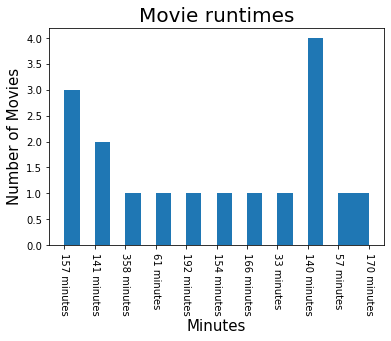

In [98]:
#set our values
plt.hist(data['runtime'],range=(110,120),bins = 20)
plt.title('Movie runtimes', fontsize = 20) #title of our plot
plt.xlabel('Minutes', fontsize = 15  ) #x axis
plt.ylabel('Number of Movies', fontsize = 15) #y axis
plt.xticks(rotation=-90) #how we want our labels on the x axis to appear
plt.show()

From the above histogram,we can see that alot of movies created lasted for 140 minutes


5.2 Visualizing Domestic gross and year using sns bar plot

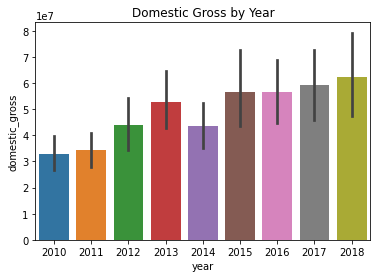

In [99]:
sns.barplot(x='year',y='domestic_gross',data=movie_gross)
plt.title('Domestic Gross by Year')
plt.show()

The bar plot of domestic gross by year shows that 2018 was the year where the income earned from movies locally was the highest.It was the most lucrative year.
2010 had the lowest income earned locally from the movies created.

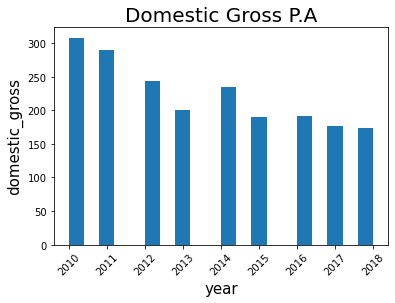

In [100]:
plt.hist(movie_gross['year'],bins = 20)
plt.title('Domestic Gross P.A', fontsize = 20)
plt.xlabel('year', fontsize = 15  )
plt.ylabel('domestic_gross', fontsize = 15)
plt.xticks(rotation=45)
plt.show()

5.3 Displaying the top 10 most popular movies.

<AxesSubplot:xlabel='popularity', ylabel='title'>

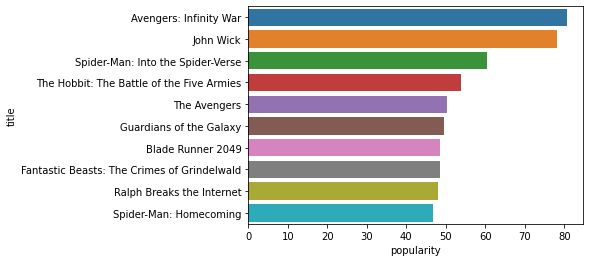

In [251]:
sns.barplot(x='popularity',y=top_10movies.index,data=top_10movies)

The most popular movie was the Avengers.

In [ ]:
sns.barplot(x='popularity',y=top_10movies.index,data=top_10movies)

5.4 Scatter plot of popularity against count

<AxesSubplot:xlabel='genre', ylabel='rating'>

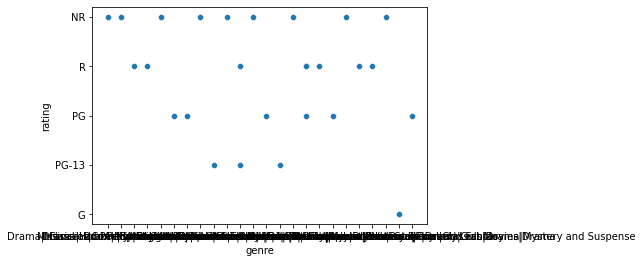

In [68]:
sns.scatterplot(x='genre',y='rating',data=movie_information)

There is no correlation between popularity and vote_count.

6.EVALUATION


7.CONCLUSION